In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
import scipy
from velocity.velocity_data import age_vel_disp
from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    lam = f['lam'][:]
    bulge_ratio = f['bulge_ratio'][:]
    ellipticity = f['ellipticity'][:]
    lambda_obs = f['lambda_obs'][:]
    lam_effec = f['lam_effective'][:]
    eps_effec = f['ellipticity_effective'][:]

In [3]:
id = ids[0]
vel_disp_young,vel_disp_old,vel_disp_tot = age_vel_disp(id)

D:\moira\TNG work\Pathak_2021\velocity\velocity_data.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  minor = np.min(np.float32(w))
D:\moira\TNG work\Pathak_2021\velocity\velocity_data.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  major = np.max(np.float32(w))


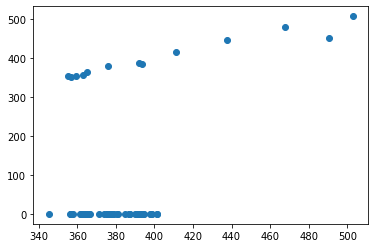

In [4]:
plt.scatter(vel_disp_young,vel_disp_tot)
plt.xlabel()